# <font face = 'Impact' color = '#FFAEBC' > Sample Demonstration on Multiple Regression <font/>
#### <font face = 'Times New Roman' color = '#B5E5CF'> License: GPL v3.0<font/>
#### <font face = 'Times New Roman' color = '#B5E5CF'> Author and Trainer: Paolo Hilado MSc. (Data Science)<font/>
This notebook provides a backgrounder on doing Multiple Regression in Python. From assumption checks to modeling via the Ordinary Least Squares Method, it aims to equip learners with a solid take on learning and applying this data analysis approach for data driven decision making.

# Business Concern
You’re a logistics operations analyst, and you want to understand what factors drive or influence your monthly operational costs, such as:
- How many drivers you employ
- How much time deliveries take
- Vehicle maintenance
- Miles driven

The Logistics Manager asked you the following question:
“Can we explain (and eventually predict or control) our operational costs using these variables?”

In [1]:
# Load necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

In [5]:
# Check Residual Normality - Preparation
residuals = model.resid

In [4]:
# Fit multiple regression model
# Define the dependent variable
y = df['OperationalCost']

# Define the independent variables (explanatory variables)
X = df[['Drivers', 'DeliveryTime', 'MaintenanceCost', 'MilesDriven']]

# Add a constant (intercept) to the independent variables
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        OperationalCost   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     7475.
Date:                Fri, 10 Oct 2025   Prob (F-statistic):          8.39e-167
Time:                        03:39:28   Log-Likelihood:                -725.20
No. Observations:                 150   AIC:                             1460.
Df Residuals:                     145   BIC:                             1475.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            9830.9947    281.056     

In [3]:
# Check out the first 6 rows
display(df.head(6))

,Drivers,DeliveryTime,MaintenanceCost,MilesDriven,OperationalCost
0,15,1.942589,3037.966131,10013.184538,22109.870670
1,13,2.080372,3021.955471,9960.994202,21471.958115
2,15,1.938657,2954.891493,10114.625032,22099.627854
3,13,2.070277,2961.422523,9756.955716,21332.816212
4,12,1.943140,2981.325092,9923.413388,21132.966142
5,16,1.973226,2927.711934,10360.878319,22508.695889


In [2]:
# Load the dataframe from LogisticsBusiness.xlsx
# Check out the information about the data frame.
df = pd.read_excel('LogisticsBusiness.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Drivers          150 non-null    int64  
 1   DeliveryTime     150 non-null    float64
 2   MaintenanceCost  150 non-null    float64
 3   MilesDriven      150 non-null    float64
 4   OperationalCost  150 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
# Load the dataframe from LogisticsBusiness.xlsx
# Check out the information about the data frame.


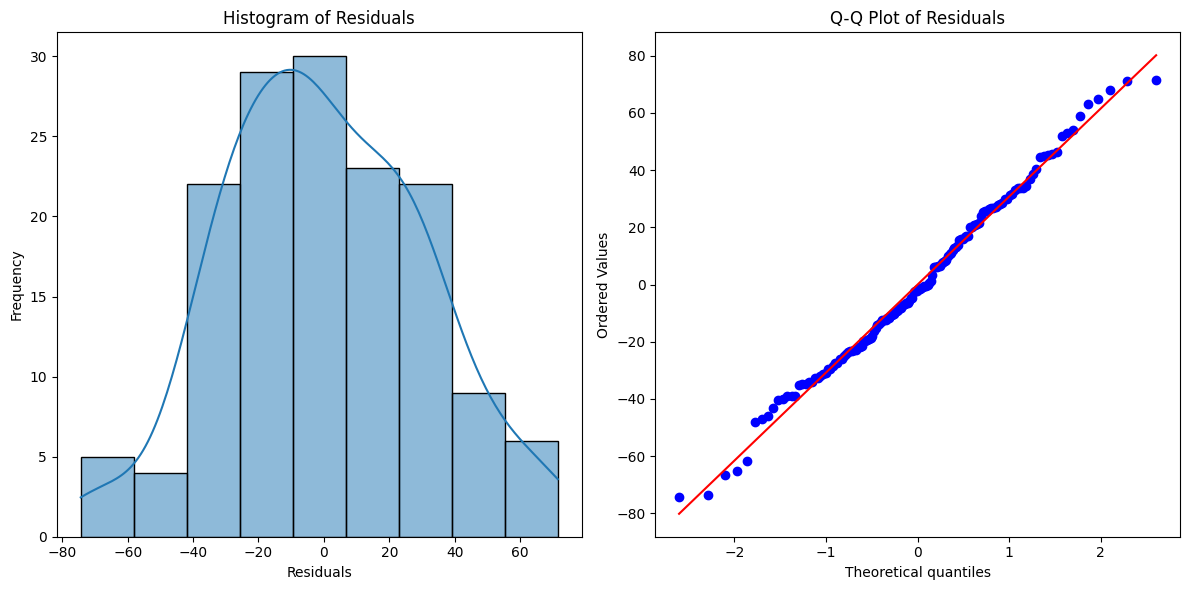

Shapiro-Wilk test statistic: 0.9912
Shapiro-Wilk test p-value: 0.4814
Residuals appear to be normally distributed (fail to reject H0)


In [7]:
# Check Residual Normality - Normality Testing

# Plotting the residuals
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Q-Q plot
plt.subplot(1, 2, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

# Shapiro-Wilk test
shapiro_test = stats.shapiro(residuals)
print(f"Shapiro-Wilk test statistic: {shapiro_test.statistic:.4f}")
print(f"Shapiro-Wilk test p-value: {shapiro_test.pvalue:.4f}")

if shapiro_test.pvalue > 0.05:
    print("Residuals appear to be normally distributed (fail to reject H0)")
else:
    print("Residuals do not appear to be normally distributed (reject H0)")

In [ ]:
# Check out the first 6 rows


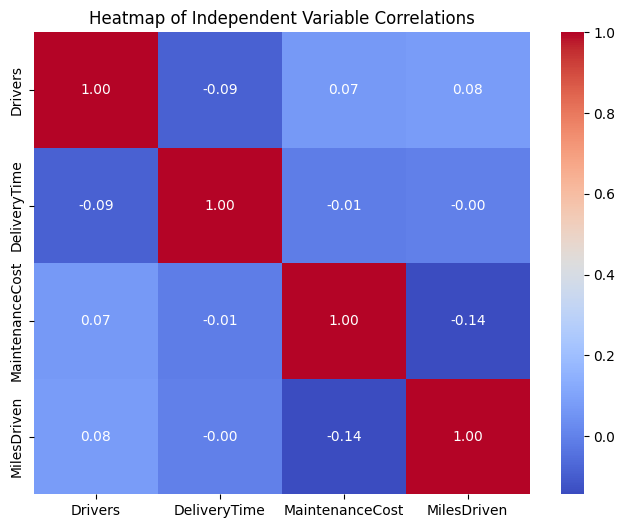

In [8]:
# Create a heatmap to check for Multicollinearity
plt.figure(figsize=(8, 6))
sns.heatmap(X.iloc[:, 1:].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Independent Variable Correlations')
plt.show()

In [ ]:
# Fit multiple regression model


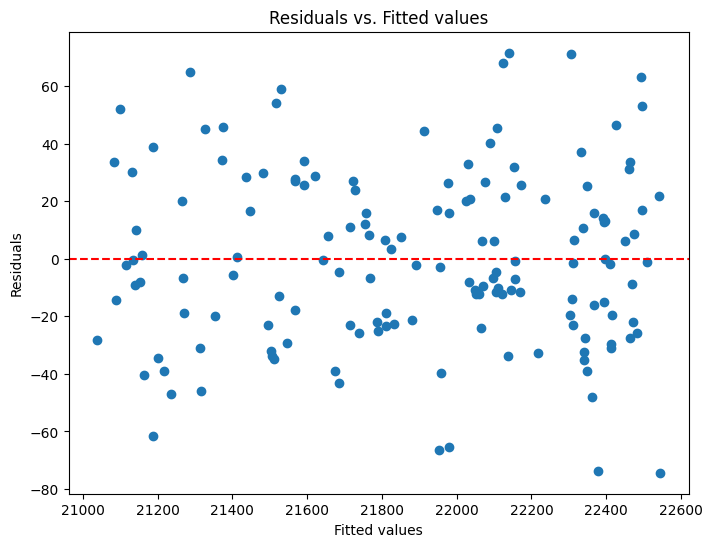

In [9]:
# Check Homoscedasticity (constant variance of residuals) - Visualization
plt.figure(figsize=(8, 6))
plt.scatter(model.predict(), residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted values')
plt.show()

In [ ]:
# Check Residual Normality - Preparation


In [ ]:
# Retrieve df original variables: 'Drivers', 'DeliveryTime', 'MaintenanceCost', 'MilesDriven'

# Standardize the explanatory variables

# Retain original column names

# Add intercept

# Fit the model

# Print model Summary

In [10]:
# Check Homoscedasticity (constant variance of residuals) - Breusch-Pagan test
bp_test = het_breuschpagan(residuals, X)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))

if bp_test[1] > 0.05:
    print("Residuals appear to be homoscedastic (fail to reject H0)")
else:
    print("Residuals appear to be heteroscedastic (reject H0)")

{'Lagrange multiplier statistic': np.float64(9.233239355155215), 'p-value': np.float64(0.05552678980555936), 'f-value': np.float64(2.3777269938663905), 'f p-value': np.float64(0.05458233345529253)}
Residuals appear to be homoscedastic (fail to reject H0)


In [ ]:
# Check Residual Normality - Normality Testing


In [ ]:
# Create a heatmap to check for Multicollinearity


In [ ]:
# Check Homoscedasticity (constant variance of residuals) - Visualization


In [ ]:
# Check Homoscedasticity (constant variance of residuals) - Breusch-Pagan test


In [ ]:
# Retrieve df original variables: 'Drivers', 'DeliveryTime', 'MaintenanceCost', 'MilesDriven'

# Standardize the explanatory variables

# Retain original column names

# Add intercept

# Fit the model

# Print model Summary
